**Grade Distribution Prediction**

---

\

In [1]:
# Mount google drive to load the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Import library 
import numpy as np
from numpy import unique  # can also just use np.unique
import pandas as pd
from sklearn import metrics
import random
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Files**

In [32]:
# Load the training dataset (Extrapolated Dataset)
pd.set_option('display.max_columns',None)
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/extrapolated_dataset.csv')

del train['Unnamed: 0']

train.head()

,Students,Questions,Exam Duration,Total Marks,Average Time Taken,Difficulty,Mean,STD
0,289,40,120,100,48,0.748335,70.660900,20.481256
1,289,40,120,100,51,0.723767,68.366782,20.498571
2,289,40,120,100,50,0.736008,69.622837,20.485250
3,289,40,120,100,49,0.748659,70.757785,20.122804
4,289,40,120,100,48,0.757591,71.830450,19.203469


In [34]:
# Load the test dataset (Final Exam Dataset)
pd.set_option('display.max_columns',None)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/test_dataset.csv')

del test['Unnamed: 0']

test.head()

,Students,Questions,Exam Duration,Total Marks,Average Time Taken,Difficulty,Mean,STD
0,324,35,120,100,109,0.579256,56.624599,18.209648
1,328,37,120,100,109,0.550915,53.207138,15.632380
2,371,35,120,100,112,0.614567,55.533666,16.420352


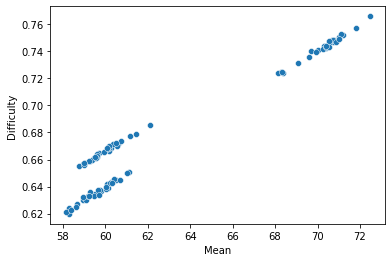

In [7]:
# Scatter plot between the difficulty index and Mean
sns.scatterplot(data=train, x="Mean", y="Difficulty")

**Correlation Matrix**

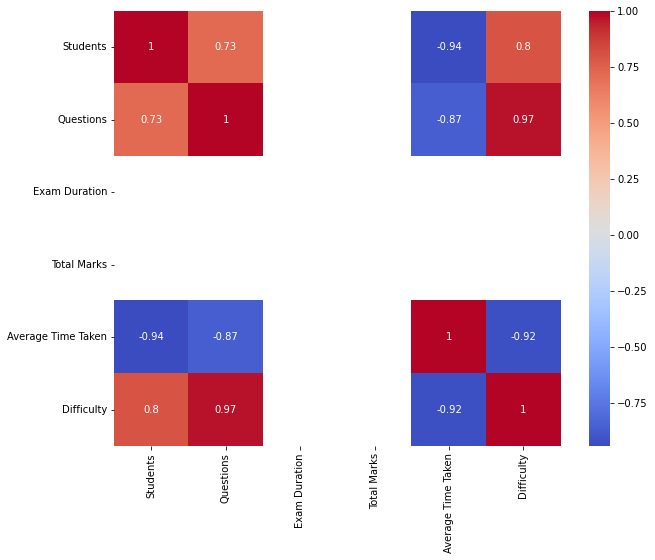

In [ ]:
#calculating correlation among independent variable 
x = train.drop(['Mean','STD'],axis=1) 
corr_matrix = x.corr() 

#plot correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,  cmap='coolwarm', annot=True)

**Linear Regression**

---

**Training the Model**

In [9]:
# Splitting the dataset into X and Y component

# Train dataset
x_train = train.drop(['Mean','STD'],axis=1)  
y_train = train[['Mean','STD']]

# Test Dataset
x_test = test.drop(['Mean','STD'],axis=1)  
y_test = test[['Mean','STD']]

In [10]:
# Implement the regression model
from sklearn import linear_model

# Fit the regression model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

**Model Evaluation**

In [13]:
# Display the regression coefficients of the parameters
coef_mean = list(reg.coef_[0].flatten())
coef_std = list(reg.coef_[1].flatten())
coeff_df = pd.DataFrame({'Mean Coefficient': coef_mean,
                         'STD Coefficient': coef_std},index = x_train.columns)
coeff_df

,Mean Coefficient,STD Coefficient
Students,8.859195e-02,2.858618e-03
Questions,-6.158972e-01,2.054705e-02
Exam Duration,-1.110223e-15,2.775558e-16
Total Marks,1.421085e-14,-3.552714e-15
Average Time Taken,6.189292e-03,-1.467219e-01
Difficulty,1.021616e+02,-1.621102e+01


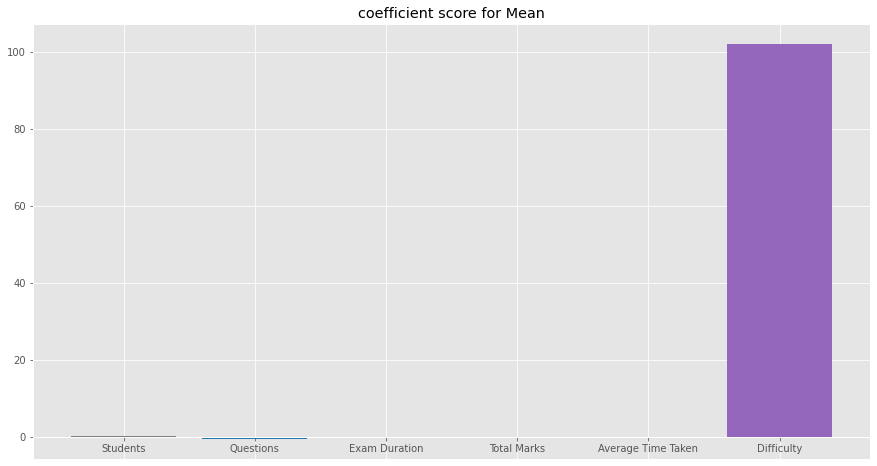

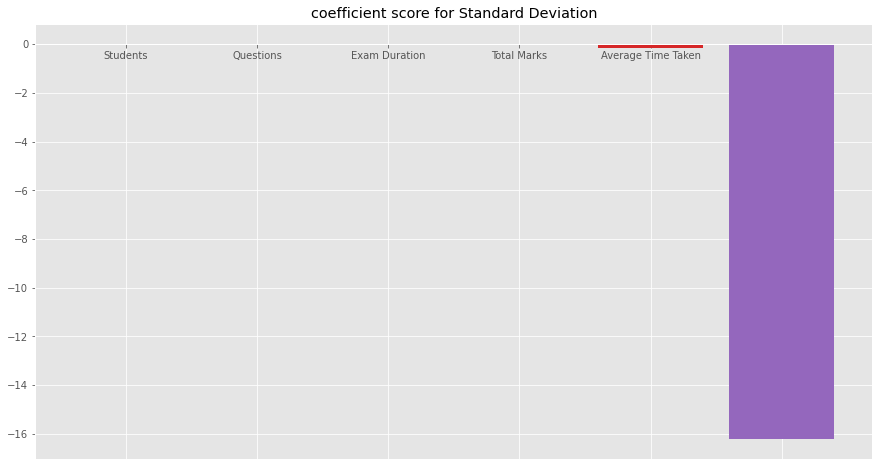

In [18]:
# plotting the coefficient score for Mean

fig, ax = plt.subplots(figsize =(15, 8))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple']

ax.bar(coeff_df.index,
coeff_df['Mean Coefficient'],
color = color)
 
ax.spines['bottom'].set_position('zero')

plt.title('coefficient score for Mean') 
plt.style.use('ggplot')
plt.show()

# plotting the coefficient score for Standard Deviation

fig, ax = plt.subplots(figsize =(15, 8))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple']
 
ax.bar(coeff_df.index,
coeff_df['STD Coefficient'],
color = color)
 
ax.spines['bottom'].set_position('zero')

plt.title('coefficient score for Standard Deviation') 
plt.style.use('ggplot')
plt.show()

In [19]:
# R2 score on the train set
reg.score(x_train, y_train)

0.6797508569468338

**Prediction**

In [20]:
# Predicting the values for the final exam 
y_pred = reg.predict(x_test)

In [21]:
# Comparing the predictions with the true values
result = pd.DataFrame(list(map(np.ravel, y_pred)), columns =['Predicted Mean', 'Predicted STD'])
compare = y_test.join(result)
compare

,Mean,STD,Predicted Mean,Predicted STD
0,56.624599,18.209648,60.076583,14.152392
1,53.207138,15.632380,56.303758,14.664362
2,55.533666,16.420352,67.866408,13.274153


**Model Accuracy**

In [22]:
# Evaluating the accuracy metrices of the model 
print('MAPE:',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2:',metrics.r2_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAPE: 0.13626239841786014
R2: -17.15642023989348
MAE: 4.508803261364761
MSE: 33.48312240142246
RMSE: 5.786460265259104


**Grade Distribution**

Mean: 60.076582786747316    STD: 14.152391760761965


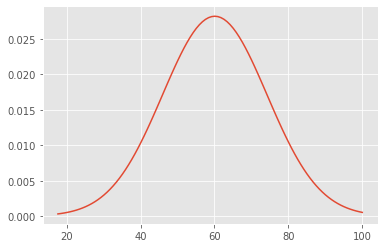

Mean: 56.30375819363205    STD: 14.664362231020611


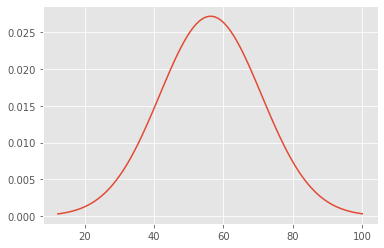

Mean: 67.86640831313002    STD: 13.274153021138734


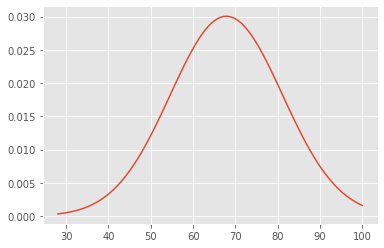

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

for i in np.arange(0,3,1):
  fig, ax = plt.subplots(figsize =(6, 4))

  mu = result['Predicted Mean'][i]
  sigma = result['Predicted STD'][i]
  print('Mean:',mu,'  ','STD:',sigma)

  x = np.linspace(0, 100, 100)
  x = np.linspace(mu - 3*sigma, 100, 100)

  plt.plot(x, stats.norm.pdf(x, mu, sigma))
  plt.show()

**Ridge Regression**

---



**Training the model**

In [28]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)

**Model Evaluation**

In [29]:
# get ridge coefficient and print them
coef_mean = list(ridgeR.coef_[0].flatten())
coef_std = list(ridgeR.coef_[1].flatten())
coeff_df = pd.DataFrame({'Mean Coefficient': coef_mean,
                         'STD Coefficient': coef_std},index = x_train.columns)
coeff_df

,Mean Coefficient,STD Coefficient
Students,0.058301,0.007996
Questions,0.857931,-0.210818
Exam Duration,0.000000,0.000000
Total Marks,0.000000,0.000000
Average Time Taken,-0.422400,-0.076632
Difficulty,0.479033,-0.076505


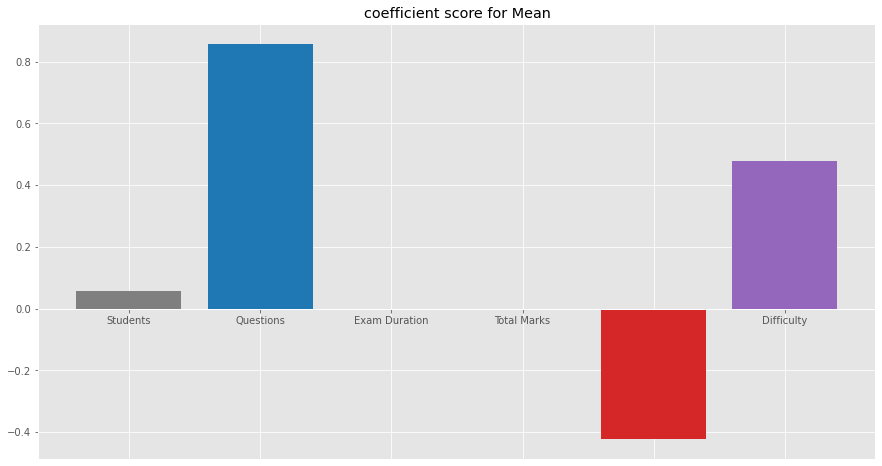

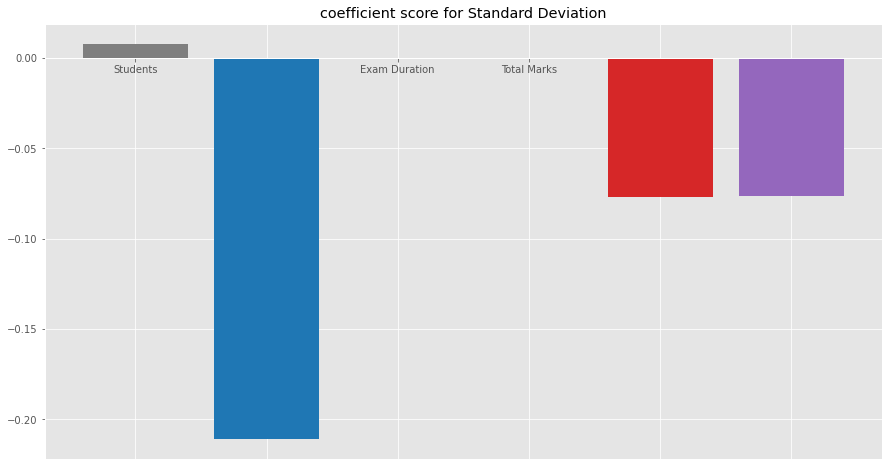

In [30]:
# plotting the coefficient score for Mean

fig, ax = plt.subplots(figsize =(15, 8))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple']

ax.bar(coeff_df.index,
coeff_df['Mean Coefficient'],
color = color)
 
ax.spines['bottom'].set_position('zero')

plt.title('coefficient score for Mean') 
plt.style.use('ggplot')
plt.show()

# plotting the coefficient score for Standard Deviation

fig, ax = plt.subplots(figsize =(15, 8))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple']
 
ax.bar(coeff_df.index,
coeff_df['STD Coefficient'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.title('coefficient score for Standard Deviation') 
plt.style.use('ggplot')
plt.show()

**Prediction**

In [31]:
# Predicting the values for the final exam 
y_pred = ridgeR.predict(x_test)

In [ ]:
# Comparing predictions with the true values
result = pd.DataFrame(list(map(np.ravel, y_pred)), columns =['Predicted Mean', 'Predicted STD'])
compare = y_test.join(result)
compare

,Mean,STD,Predicted Mean,Predicted STD
0,56.624599,18.209648,42.663185,17.039519
1,53.207138,15.632380,44.598673,16.652035
2,55.533666,16.420352,44.153037,17.182720


**Model Accuracy**

In [ ]:
# Evaluating the accuracy metrices of the model 
print('MAPE:',metrics.mean_absolute_percentage_error(y_test,y_pred))
print('R2:',metrics.r2_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAPE: 0.13153310401656698
R2: -32.12858305483731
MAE: 6.150443305921577
MSE: 66.92259515472713
RMSE: 8.180623151980974


**Grade Distribution**

Mean: 42.66318483398928    STD: 17.039518902260774


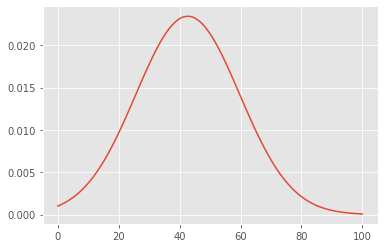

Mean: 44.59867312573103    STD: 16.652034533497208


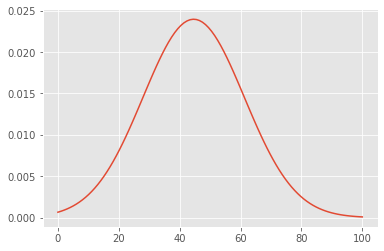

Mean: 44.15303687377264    STD: 17.182720339644465


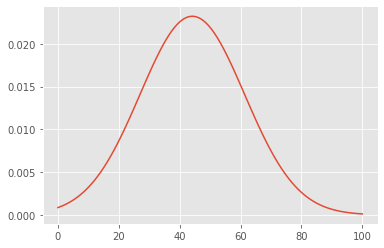

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

for i in np.arange(0,3,1):
  mu = result['Predicted Mean'][i]
  sigma = result['Predicted STD'][i]
  print('Mean:',mu,'  ','STD:',sigma)

  x = np.linspace(0, 100, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))
  plt.show()